## PCA

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [167]:
import warnings
warnings.filterwarnings('ignore')

### Task 1: Exploratory Data Analysis (EDA):

In [170]:
data = pd.read_csv('wine.csv')

In [172]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [174]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [176]:
data.shape

(178, 14)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


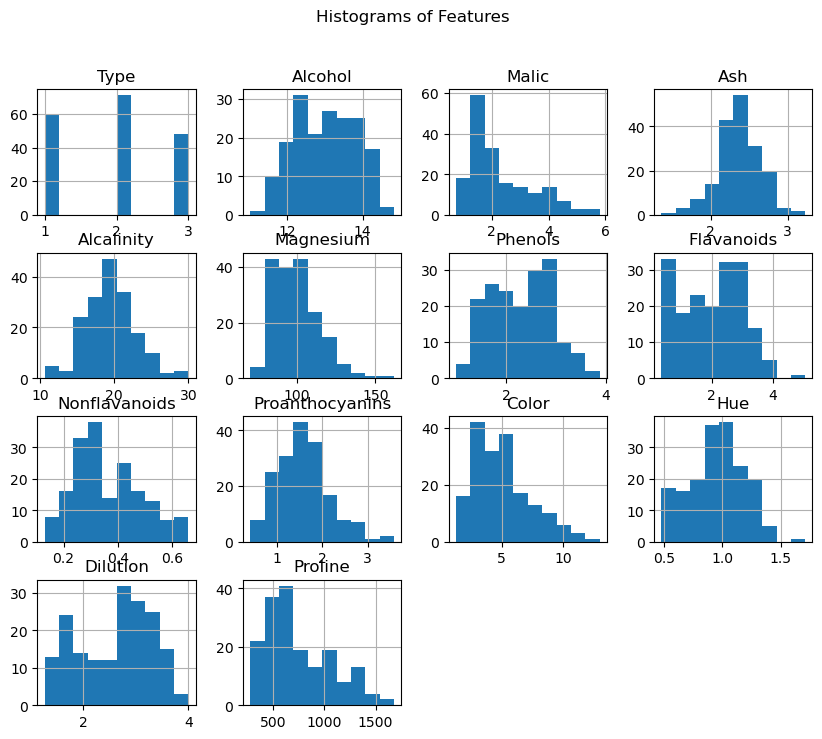

In [180]:
# Histograms

data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features')
plt.show()

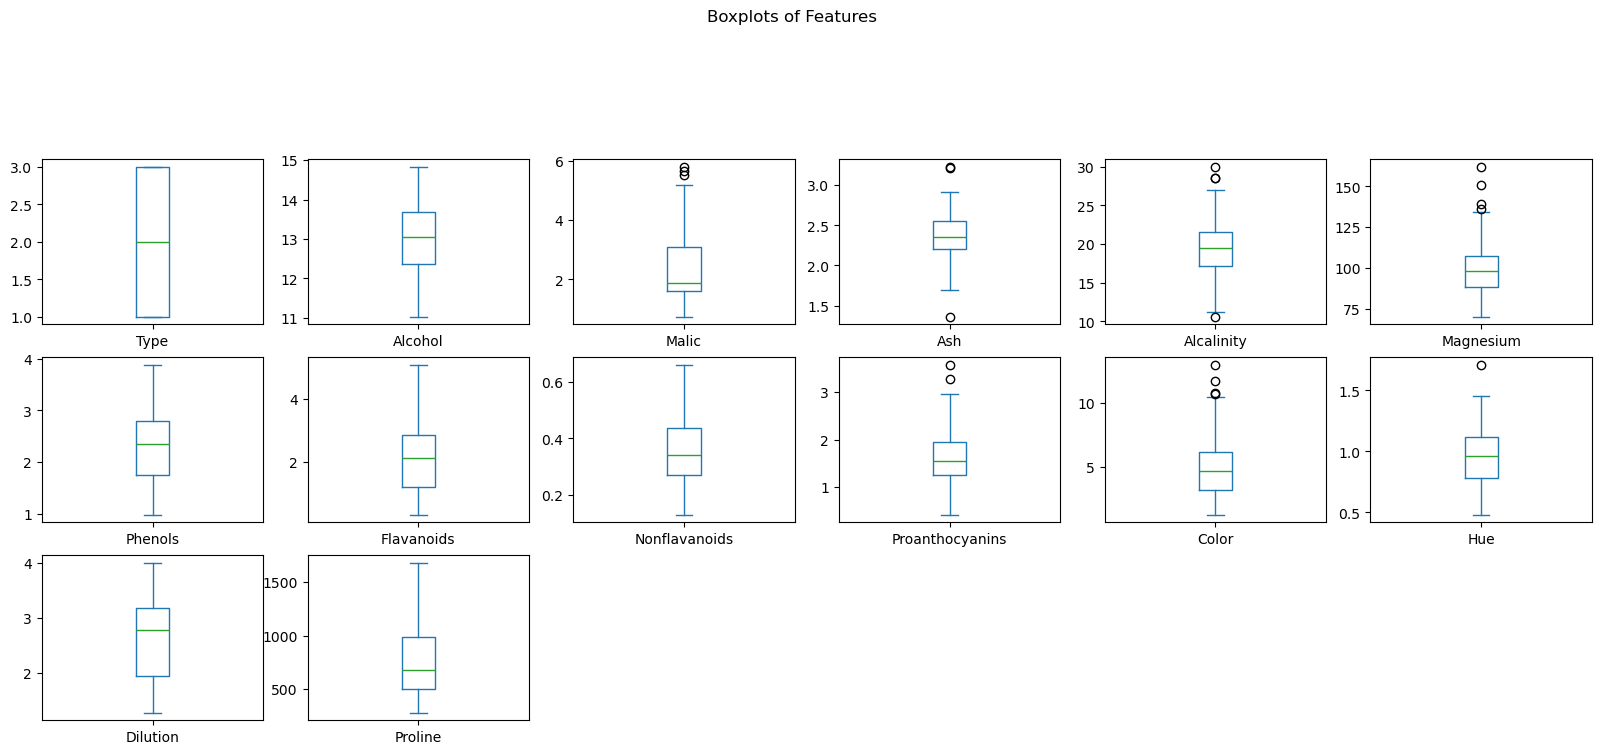

In [181]:
# Box plots

data.plot(kind='box', subplots=True,layout=(6,6),figsize=(20, 15))
plt.suptitle('Boxplots of Features')
plt.show()

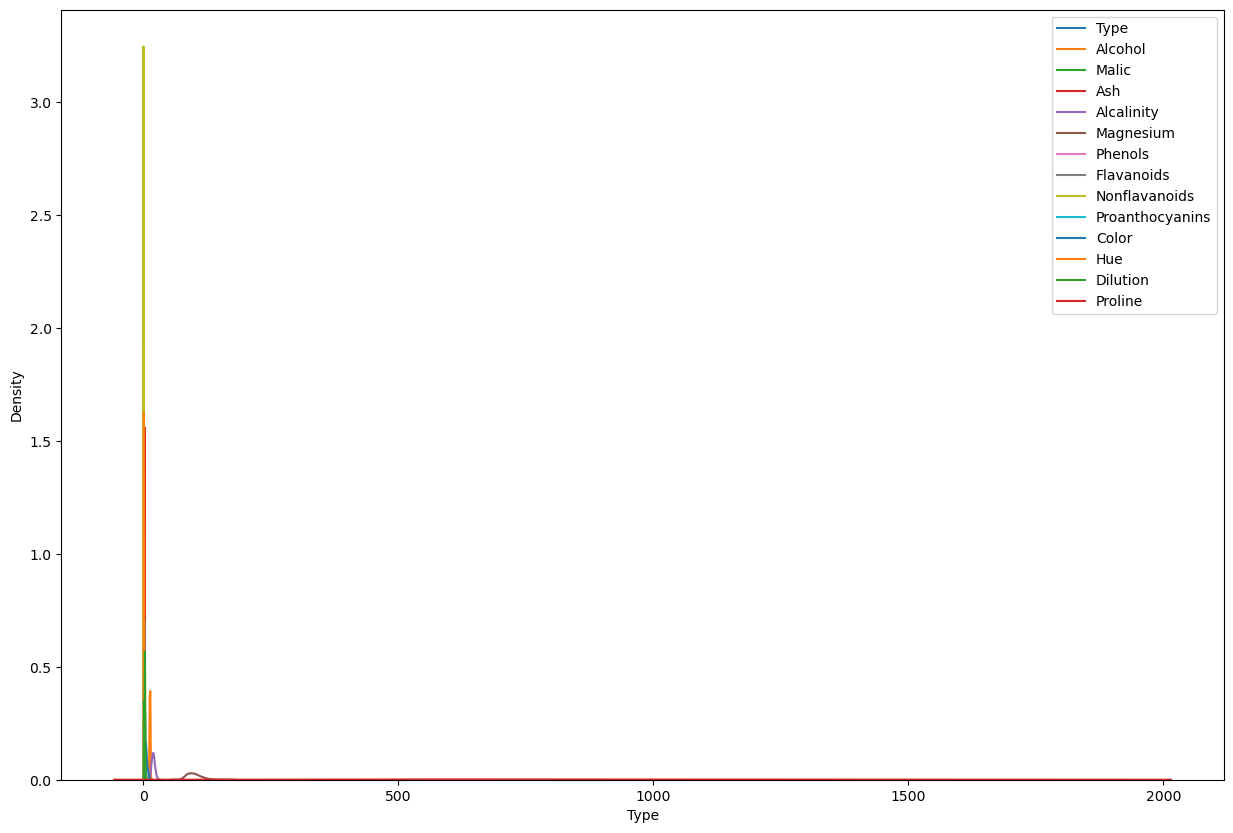

In [182]:
#Density plots

plt.figure(figsize=(15, 10))
for column in data.columns:
    sns.kdeplot(data[column], label=column)
plt.legend()
plt.show()

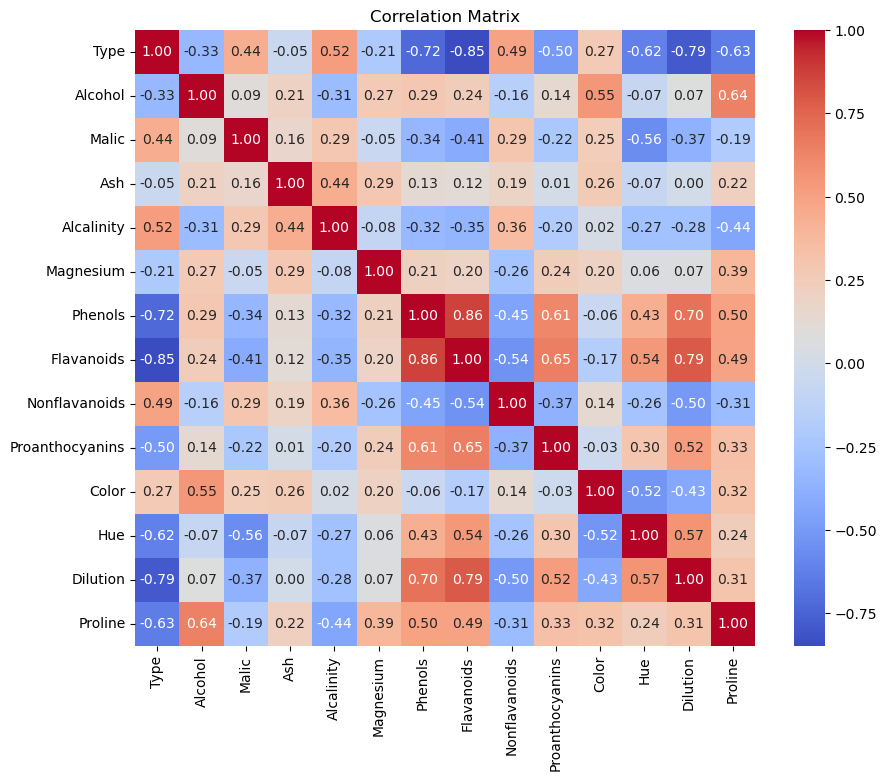

In [184]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Task 2: Dimensionality Reduction with PCA:

In [188]:
#1.	Standardize the features 

scaler = StandardScaler()
scaler

StandardScaler()

In [191]:
scaled_data = scaler.fit_transform(data)

In [193]:
#Implement PCA to reduce the dimensionality of the dataset.
pca = PCA()
pca.fit(scaled_data)

PCA()

In [195]:
#2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

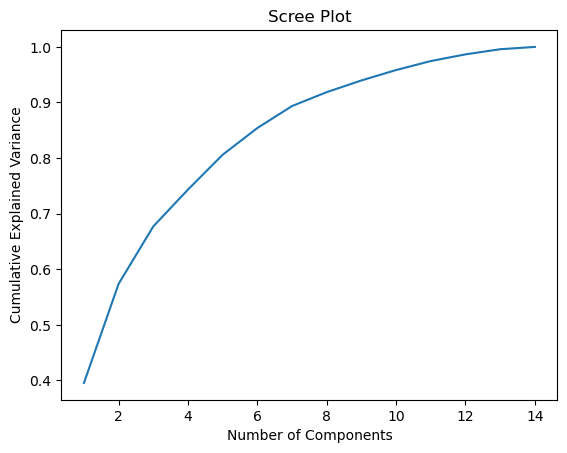

In [197]:
# Scree plot to determine optimal number of components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [199]:
# 3. Determine the optimal number of principal components
# From scree plot or cumulative explained variance, select the number of components
n_components = 4  # Adjust as per your choice

In [201]:
# Fit PCA with the selected number of components

pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

### Task 3: Clustering with Original Data:

In [205]:
#1.	Apply a clustering algorithm 
kmeans = KMeans(n_clusters=3, random_state=42)
original_clusters = kmeans.fit_predict(scaled_data)

In [207]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [209]:
original_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

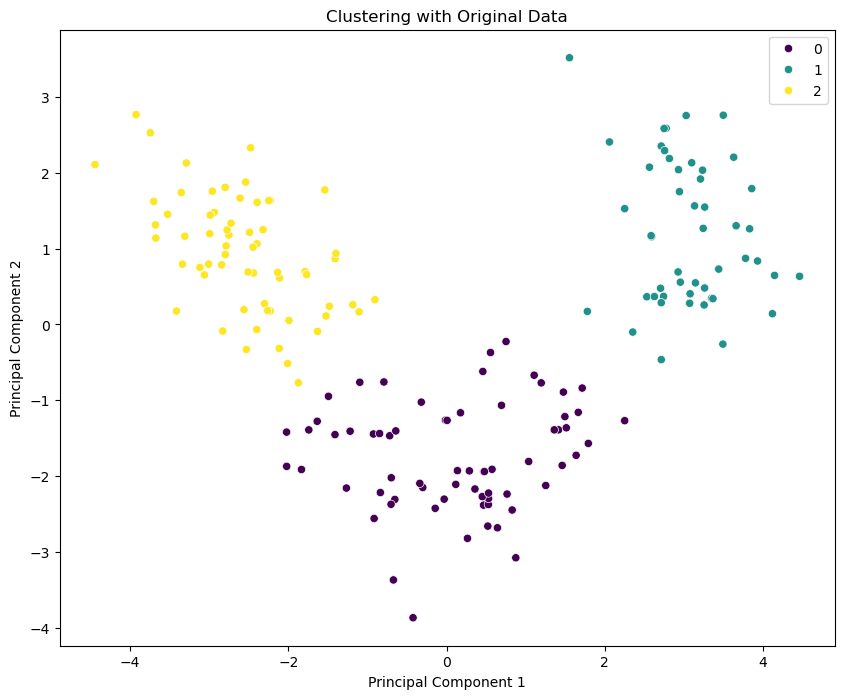

In [211]:
#2.Visualize the clustering results using appropriate plots.
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=original_clusters, palette='viridis')
plt.title('Clustering with Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [213]:
# 3. Evaluate clustering performance
silhouette_original = silhouette_score(scaled_data, original_clusters)
db_index_original = davies_bouldin_score(scaled_data, original_clusters)

In [215]:
print("Original Data - Silhouette Score:", silhouette_original)
print("Original Data - Davies-Bouldin Index:", db_index_original)

Original Data - Silhouette Score: 0.30648398324833453
Original Data - Davies-Bouldin Index: 1.315707552261773


### Task 4: Clustering with PCA Data:

In [218]:
#1.Apply the same clustering algorithm to the PCA-transformed dataset.

In [220]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_data)

In [222]:
kmeans_pca

KMeans(n_clusters=3, random_state=42)

In [224]:
pca_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

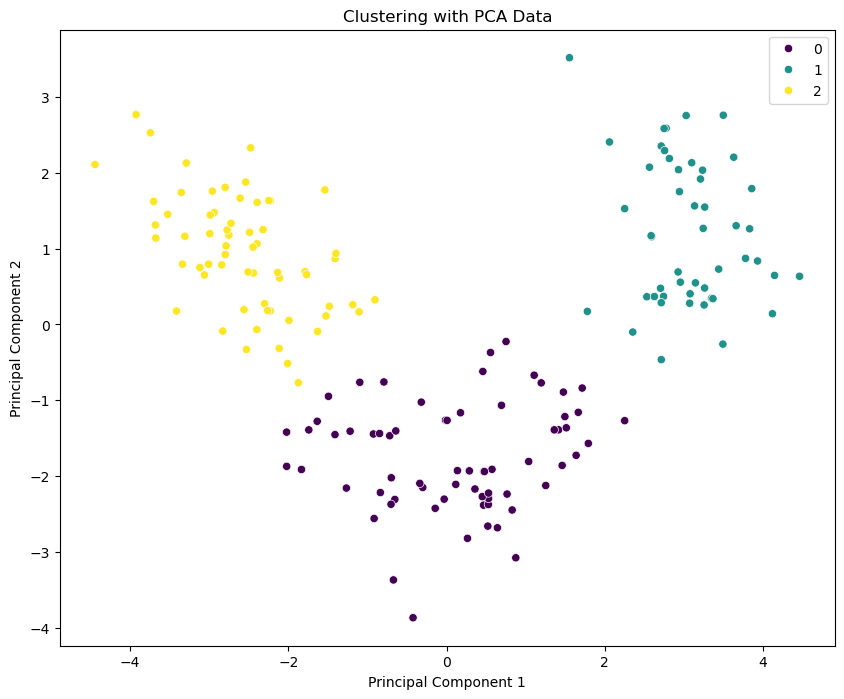

In [226]:
#2.Visualize the clustering results obtained from PCA-transformed data.

# Visualize the clusters using pairplot or other suitable plots.

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [228]:
# Evaluate clustering performance
silhouette_pca = silhouette_score(pca_data, pca_clusters)
davies_bouldin_pca = davies_bouldin_score(pca_data, pca_clusters)

In [230]:
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.4367881227595951
Davies-Bouldin Index (PCA Data): 0.9186773896497297


### Task 5: Comparison and Analysis:

In [237]:
# 1.Compare clustering results

In [239]:

print(f'Silhouette Score (PCA Data): {silhouette_pca}')


Silhouette Score (PCA Data): 0.4367881227595951


In [241]:
print("Original Data - Silhouette Score:", silhouette_original)
print("Original Data - Davies-Bouldin Index:", db_index_original)

Original Data - Silhouette Score: 0.30648398324833453
Original Data - Davies-Bouldin Index: 1.315707552261773


### Task 6: Conclusion and Insights